In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [32]:
df = pd.read_csv("C:/Users/q1451463/Documents/trimmed data_test_python.csv", parse_dates=['Attrib_Order_Dt'], index_col='Attrib_Order_Dt')
print(df.shape)  # (123, 8)
df.tail()

(1592, 8)


,unscript_sales,avg_ez_pay,pct_free_sh,avg_pct_off,pct_orders_discount,marketing_plan,total_cases,total_deaths
Attrib_Order_Dt,,,,,,,,
2020-05-06,7662551.60000,4.53378,0.41390,0.18539,0.20968,175498,1204475,71078
2020-05-07,6605602.72000,3.84212,0.22030,0.18285,0.23984,151311,1228603,73431
2020-05-08,6466354.30000,3.76383,0.21512,0.18539,0.25671,195179,1256972,75670
2020-05-09,6423114.53000,3.78223,0.21776,0.22441,0.34872,264168,1283929,77180
2020-05-10,5734946.87000,4.16739,0.31665,0.17400,0.28741,244241,1309541,78794


In [33]:
df.describe ()

,unscript_sales,avg_ez_pay,pct_free_sh,avg_pct_off,pct_orders_discount,marketing_plan,total_cases,total_deaths
count,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000
mean,5456920.20937,3.55513,0.19134,0.20153,0.24991,137983.62123,19818.18090,1023.60113
std,2329553.21336,1.00721,0.14579,0.03725,0.12517,103061.30928,131154.44503,7355.93504
min,2262678.28000,1.89600,0.01951,0.05119,0.04781,16117.00000,0.00000,0.00000
25%,4092336.26500,2.70597,0.10798,0.17888,0.16533,70943.00000,0.00000,0.00000
50%,4689240.71500,3.33972,0.15549,0.19478,0.22055,105742.00000,0.00000,0.00000
75%,5833170.34250,4.26476,0.22151,0.21475,0.29482,167945.00000,0.00000,0.00000
max,21961824.23000,5.91976,0.99491,0.49109,0.73386,929677.00000,1309541.00000,78794.00000


In [34]:
df.round(5)

,unscript_sales,avg_ez_pay,pct_free_sh,avg_pct_off,pct_orders_discount,marketing_plan,total_cases,total_deaths
Attrib_Order_Dt,,,,,,,,
2016-01-01,5566909.02000,3.49861,0.18520,0.19488,0.24674,74208,0,0
2016-01-02,4326115.09000,2.91733,0.04814,0.16302,0.12630,61830,0,0
2016-01-03,3985543.54000,2.86113,0.07395,0.16943,0.20275,62061,0,0
2016-01-04,3768104.34000,2.64951,0.04934,0.18793,0.23158,55479,0,0
2016-01-05,3793358.15000,2.66557,0.10853,0.14793,0.14187,51820,0,0
2016-01-06,3604911.64000,2.45755,0.14214,0.20175,0.22056,44937,0,0
2016-01-07,3881485.03000,2.84632,0.04434,0.18029,0.19087,58477,0,0
2016-01-08,4217423.49000,2.73164,0.05337,0.20408,0.26947,65934,0,0
2016-01-09,4307567.48000,2.87280,0.08732,0.22165,0.20316,66354,0,0


In [35]:
#Assign display.flot_format
pd.options.display.float_format = '{:.5f}'.format

In [36]:
df.describe ()

,unscript_sales,avg_ez_pay,pct_free_sh,avg_pct_off,pct_orders_discount,marketing_plan,total_cases,total_deaths
count,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000,1592.00000
mean,5456920.20937,3.55513,0.19134,0.20153,0.24991,137983.62123,19818.18090,1023.60113
std,2329553.21336,1.00721,0.14579,0.03725,0.12517,103061.30928,131154.44503,7355.93504
min,2262678.28000,1.89600,0.01951,0.05119,0.04781,16117.00000,0.00000,0.00000
25%,4092336.26500,2.70597,0.10798,0.17888,0.16533,70943.00000,0.00000,0.00000
50%,4689240.71500,3.33972,0.15549,0.19478,0.22055,105742.00000,0.00000,0.00000
75%,5833170.34250,4.26476,0.22151,0.21475,0.29482,167945.00000,0.00000,0.00000
max,21961824.23000,5.91976,0.99491,0.49109,0.73386,929677.00000,1309541.00000,78794.00000


In [ ]:
#reset display 
#pd.reset_option('^display.', silent=True)

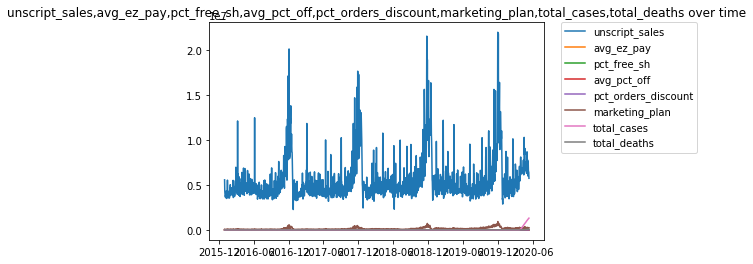

In [37]:
plt.plot(df['unscript_sales'], label="unscript_sales")
plt.plot(df['avg_ez_pay'], label="avg_ez_pay")
plt.plot(df['pct_free_sh'], label="pct_free_sh")
plt.plot(df['avg_pct_off'], label="avg_pct_off")
plt.plot(df['pct_orders_discount'], label="pct_orders_discount")
plt.plot(df['marketing_plan'], label="marketing_plan")
plt.plot(df['total_cases'], label="total_cases")
plt.plot(df['total_deaths'], label="total_deaths")
# Placing a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('unscript_sales,avg_ez_pay,pct_free_sh,avg_pct_off,pct_orders_discount,marketing_plan,total_cases,total_deaths over time')
plt.show()

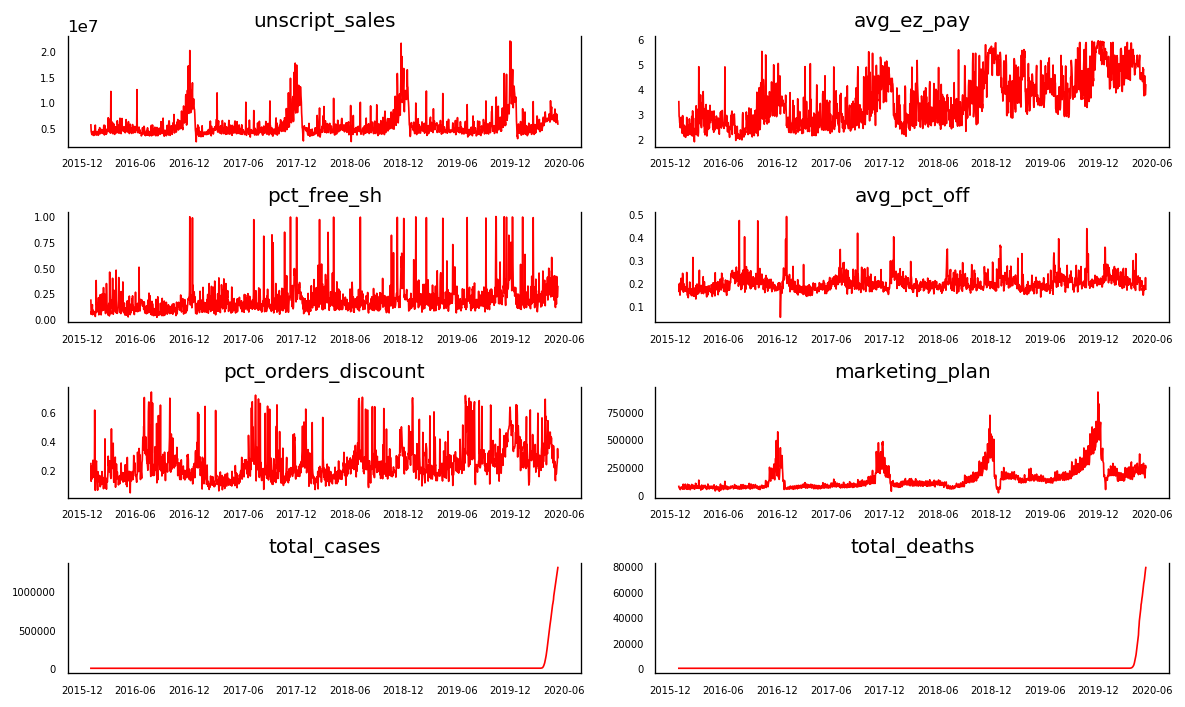

In [38]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

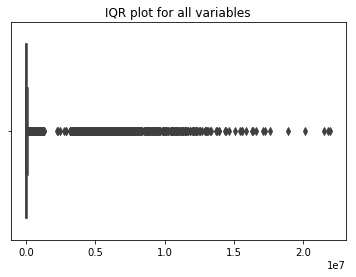

In [39]:
import seaborn as sns # for Data visualization
plt.title('IQR plot for all variables')
sns.boxplot(x=df)
plt.show()

In [40]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':
        round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    # Print Summary
    print(f'Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f'Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f'Significance Level = {signif}')
    print(f'Test Statistic = {output["test_statistic"]}')
    print(f'No. Lags Chosen = {output["n_lags"]}')
    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [41]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

Augmented Dickey-Fuller Test on "unscript_sales" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -6.0177
No. Lags Chosen = 24
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


Augmented Dickey-Fuller Test on "avg_ez_pay" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -2.5198
No. Lags Chosen = 23
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.1107. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


Augmented Dickey-Fuller Test on "pct_free_sh" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test St

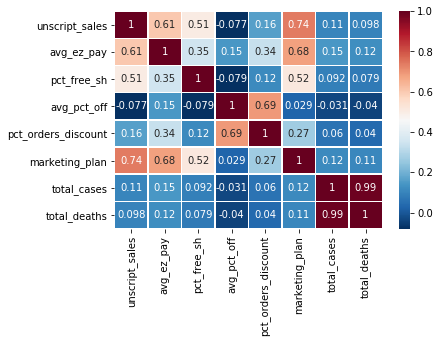

In [42]:
pearsoncorr = df.corr(method='pearson')
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
cmap='RdBu_r',
annot=True,
linewidth=0.5)
plt.show()

In [43]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
unscript_sales ::  899.89    > 143.6691  =>   True
avg_ez_pay ::  488.27    > 111.7797  =>   True
pct_free_sh ::  278.38    > 83.9383   =>   True
avg_pct_off ::  161.9     > 60.0627   =>   True
pct_orders_discount ::  80.4      > 40.1749   =>   True
marketing_plan ::  26.33     > 24.2761   =>   True
total_cases ::  7.04      > 12.3212   =>   False
total_deaths ::  0.12      > 4.1296    =>   False


(1587, 7)
(5, 7)
                 unscript_sales  avg_ez_pay  pct_free_sh  pct_orders_discount  \
Attrib_Order_Dt                                                                 
2016-01-02       -1240793.93000    -0.58128     -0.13706             -0.12045   
2016-01-03        -340571.55000    -0.05620      0.02581              0.07645   
2016-01-04        -217439.20000    -0.21162     -0.02460              0.02883   
2016-01-05          25253.81000     0.01606      0.05918             -0.08971   
2016-01-06        -188446.51000    -0.20802      0.03361              0.07869   

                 marketing_plan  total_cases  total_deaths  
Attrib_Order_Dt                                             
2016-01-02         -12378.00000      0.00000       0.00000  
2016-01-03            231.00000      0.00000       0.00000  
2016-01-04          -6582.00000      0.00000       0.00000  
2016-01-05          -3659.00000      0.00000       0.00000  
2016-01-06          -6883.00000      0.00000     

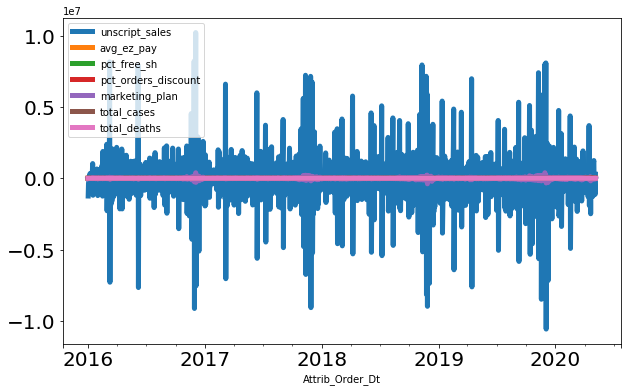

In [44]:
df = df [['unscript_sales', 'avg_ez_pay', 'pct_free_sh', 'pct_orders_discount', 'marketing_plan', 'total_cases', 'total_deaths']]
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check size
print(df_train.shape)
print(df_test.shape)
df_tr_diff = df_train.diff()
df_tr_diff.dropna(inplace=True)
print(df_tr_diff.head())
df_tr_diff.plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.show()

In [46]:
# ADF Test on each column
for name, column in df_tr_diff.iteritems():
    adfuller_test(column, name=column.name)

Augmented Dickey-Fuller Test on "unscript_sales" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -8.0032
No. Lags Chosen = 22
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
Augmented Dickey-Fuller Test on "avg_ez_pay" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -9.7997
No. Lags Chosen = 24
 Critical value 1%     = -3.435
 Critical value 5%     = -2.863
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.
Augmented Dickey-Fuller Test on "pct_free_sh" 
    -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Significance Level = 0.05
Test Statistic = -14.2259
No. Lags C

In [48]:
var_model = VAR(df_tr_diff)
res = var_model.select_order(maxlags=10)
print(res.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        66.71       66.73   9.325e+28       66.71
1        63.17       63.36   2.716e+27       63.24
2        62.42       62.78   1.290e+27       62.56
3        62.10       62.62   9.294e+26       62.29
4        61.62       62.31   5.788e+26       61.88
5        61.15       62.00   3.594e+26       61.46
6        60.85       61.87   2.668e+26       61.23
7        60.65       61.84   2.179e+26       61.09
8        60.38       61.74   1.667e+26       60.88
9        60.16       61.69   1.346e+26       60.73
10      59.24*      60.93*  5.352e+25*      59.87*
--------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [49]:
#Assign display.flot_format
pd.options.display.float_format = '{:.5f}'.format

In [52]:
var_model = VAR(df_tr_diff)
res = var_model.select_order(maxlags=30)
print(res.summary())

#Assign display.flot_format
pd.options.display.float_format = '{:.5f}'.format

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        66.76       66.78   9.827e+28       66.77
1        63.22       63.41   2.861e+27       63.29
2        62.48       62.84   1.363e+27       62.61
3        62.15       62.68   9.816e+26       62.35
4        61.68       62.38   6.124e+26       61.94
5        61.20       62.07   3.807e+26       61.53
6        60.91       61.94   2.828e+26       61.29
7        60.70       61.91   2.311e+26       61.15
8        60.44       61.81   1.768e+26       60.95
9        60.22       61.76   1.429e+26       60.80
10       59.30       61.01   5.687e+25       59.94
11       58.61       60.49   2.841e+25       59.31
12       58.12       60.17   1.752e+25       58.89
13       57.72       59.93   1.169e+25       58.54
14       57.50       59.88   9.377e+24       58.39
15       56.93       59.48   5.284e+24       57.87
16       56.47       59.19   3.

In [53]:
#Fit VAR model
var_model = VAR(endog=df_tr_diff)
var_model_fit = var_model.fit(maxlags=30)
#Print a summary of the model results
var_model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Jul, 2020
Time:                     12:12:53
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    47.4964
Nobs:                     1556.00    HQIC:                   44.3065
Log likelihood:          -46979.4    FPE:                2.67357e+18
AIC:                      42.4182    Det(Omega_mle):     1.09775e+18
--------------------------------------------------------------------
Results for equation unscript_sales
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                       -1719.771251     34665.569692           -0.050           0.960
L1.unscript_sales              -0.617750         0.043055          -14.348           0.000
L1.avg_ez_p

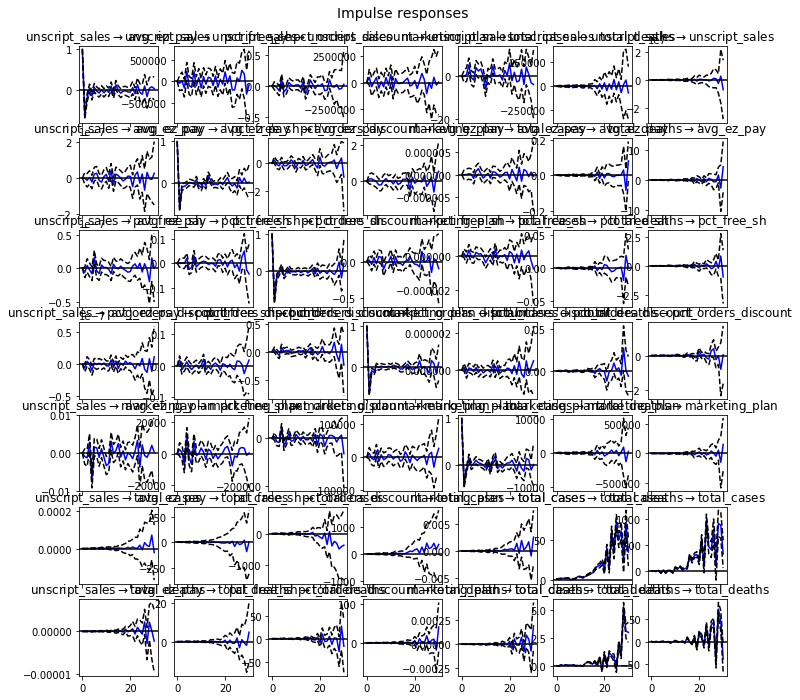

In [55]:
# Impulse Response Analysis
irf = var_model_fit.irf(30)
irf.plot()
plt.show()

In [56]:
# Get the lag order
lag_order = var_model_fit.k_ar
print(lag_order)
# Input data for forecasting
input_data = df_tr_diff.values[-lag_order:]
print(input_data)
# forecasting
pred = var_model_fit.forecast(y=input_data, steps=nobs)
pred = (pd.DataFrame(pred, index=df_test.index, columns= df.columns + '_pred'))
print(pred)

30
[[ 3.87988400e+04  1.64702226e-01 -2.22611760e-01  2.23856612e-01
  -4.49800000e+03  2.53980000e+04  1.14600000e+03]
 [ 1.26938830e+05 -8.61216700e-03  1.92913250e-01 -1.62613322e-01
  -1.32260000e+04  3.05610000e+04  1.34200000e+03]
 [ 9.58598400e+04  3.25666160e-02 -7.45420270e-02  8.76246630e-02
  -2.07820000e+04  3.06130000e+04  1.90600000e+03]
 [ 1.71262390e+05  1.61573091e-01  1.88753577e-01 -1.38022730e-02
  -4.50900000e+03  3.33230000e+04  1.92200000e+03]
 [ 2.25938530e+05 -1.70735783e-01 -1.75192020e-01 -9.99147530e-02
   3.26960000e+04  3.39010000e+04  1.87300000e+03]
 [ 6.97523740e+05  3.48340185e-01  1.51369498e-01  1.15886700e-02
   5.05170000e+04  3.55270000e+04  2.08700000e+03]
 [-1.29047735e+06 -3.20343361e-01 -2.32398891e-01  4.75796700e-02
  -2.96910000e+04  2.83910000e+04  1.83100000e+03]
 [-3.43450950e+05 -2.50418210e-02  7.53131910e-02 -1.38982020e-02
  -6.03670000e+04  2.76200000e+04  1.50000000e+03]
 [ 4.70045680e+05 -1.24348563e-01  3.05011000e-04  6.60291250

In [70]:
# inverting transformation
def invert_transformation(df_tr_diff, pred):
    forecast = pred.copy()
columns = df_train.columns
for col in columns:
    forecast [str(col)+'_pred'] = df_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
return forecast
output = invert_transformation(df_tr_diff, pred)
output.loc[:, ['unscript_sales_pred']]

NameError: name 'forecast' is not defined

In [73]:
# inverting transformation
def invert_transformation(df_tr_diff, pred):
    forecast = pred.copy()
columns = df_train.columns
for col in columns:
    forecast [str(col)+'_pred'] = df_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
return forecast
output = invert_transformation(df_tr_diff, pred)
output.loc[:, ['unscript_sales_pred']]

NameError: name 'forecast' is not defined